# 🌟 **Sephora Beauty Market Analysis**
### *A Data-Driven Exploration of Consumer Behavior, Product Performance & Market Trends*

---

## 📌 **Introduction**

The **global beauty industry** is one of the **fastest-growing markets** worldwide, valued in the hundreds of billions and projected to expand even further in the coming years. Behind the glam lies a highly competitive landscape where brands continuously fight for visibility, consumer loyalty, and market share. As customer needs evolve — from the rise of **clean beauty** and ingredient transparency to fast-changing trends driven by **social media influencers** — understanding consumer behavior has become more critical than ever.  
In this environment, **data is not just helpful — it’s essential** for shaping **product strategies, branding decisions, pricing models, and long-term growth**.

---

## 🛍️ **Why Sephora?**

Sephora stands at the center of this transformation. As one of the world’s largest beauty retailers, Sephora brings together thousands of brands across makeup, skincare, fragrance, and more.  
Its platform functions not only as a retail space but also as a **massive data ecosystem**, where consumers explore, compare, and review beauty products.

This makes Sephora an ideal lens for observing broader beauty-market dynamics, including:

- Product performance across categories  
- Brand positioning and reputation  
- Ingredient trends and rising consumer priorities  
- Shifts influenced by marketing, influencers, and online reviews  

---

## 📊 **About the Dataset**

In this analysis, we work with:

- **8,000+ Sephora products**  

This rich dataset enables us to analyze not only *what* customers love, but **why** they love it.  
We can uncover patterns in:

- Pricing  
- Branding & marketing  
- Ingredient preferences  
- Review volume & customer engagement
- 
Through this combined products-and-reviews perspective, we gain a deeper understanding of what truly drives success in today’s modern beauty market.

---

## 🎯 **Project Goals**

- **Identify top-performing products** based on ratings, review volume, and category-level popularity.  
- **Analyze price–rating relationships** to understand whether higher prices correlate with higher customer satisfaction.  
- **Evaluate brand performance** over time and detect emerging, trending, or declining brands.  
- **Investigate ingredient patterns**, including the rise of *clean beauty*, fragrance-free formulas, and consumer sensitivities.  
- **Uncover the key factors influencing product success**, combining pricing, branding, ingredients, and customer sentiment.  
- **Provide actionable insights** that can guide marketing strategy, product development, and competitive positioning.


---

---
# 🔍 **Step 1 — Dataset Overview**
<a id="dataset-overview"></a>
We begin by **exploring** the basic **structure** of the products **dataset**. This helps us understand what information is available and prepares us for the data cleaning and analysis steps that follow.


- **Import the required libraries** (NumPy, Pandas, Matplotlib, Seaborn) and **load the dataset**.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
products_df = pd.read_csv("product_info.csv")
print("\n✅ Dataset loaded successfully.")


✅ Dataset loaded successfully.


- Check the **shape of datasets**.

In [93]:
products_df.shape

(8494, 27)

### 📏 Datasets Size

-> 🧴 **Products** dataset: **8,494 rows × 27 columns**  

- **Check the first few rows** to inspect the actual data.

In [94]:
print("🧴 Sample from products dataset:")
products_df.head()

🧴 Sample from products dataset:


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


- **Check the dataset’s columns and data types.**

In [95]:
import io
from IPython.display import display, HTML

buffer_prod = io.StringIO()
products_df.info(buf=buffer_prod)
prod_info_text = buffer_prod.getvalue().replace("\n", "<br>") 

display(HTML(f"""
<div style="display: flex; justify-content: space-between; gap: 20px;">

    <div style="width: 48%; padding: 10px; background-color: #f8f8f8; border-radius: 8px;">
        <h3>🧴 PRODUCTS INFO</h3>
        <pre style="font-size: 12px;">{prod_info_text}</pre>
    </div>

</div>
"""))

### **What we learn from `.info()`:**

- Most common data type is **object** (text).
- `price` and `rating` columns are stored as **numeric** data types.
- Some columns have missing values that we will resolve in the next step.
- Product attributes such as **exclusivity, availability, and edition status** are captured through **binary 0/1 columns**, making them easy to interpret and use in analysis.

## 📚 Product Data Dictionary

| Feature              | Description |
|----------------------|-------------|
| `product_id`         | Unique identifier for each product. |
| `product_name`       | Name of the product. |
| `brand_id`           | Numeric identifier for the brand. |
| `brand_name`         | Name of the brand that owns the product. |
| `loves_count`        | Number of users who marked this product as a favorite (“loves”) on Sephora. |
| `rating`             | Average customer rating for the product (from 1.0 to 5.0). |
| `reviews`            | Total number of customer reviews for the product. |
| `size`               | Size or volume of the product (e.g., `1.7 oz / 50 mL`). |
| `variation_type`     | Type of variation available for the product (e.g., Size, Shade, Color). |
| `variation_value`    | The specific value of the variation (e.g., `30 mL`, `Light Neutral`). |
| `variation_desc`     | Full descriptive label of the variation. |
| `ingredients`        | Text list of ingredients used in the product. |
| `price_usd`          | Standard price of the product in US dollars. |
| `value_price_usd`    | Value-set price, used for special value gift sets.  |
| `sale_price_usd`     | Discounted sale price when the product is on promotion. |
| `limited_edition`    | Binary flag: `1` if the product is limited edition, `0` otherwise. |
| `new`                | Binary flag: `1` if the product is marked as new, `0` otherwise. |
| `online_only`        | Binary flag: `1` if the product is sold only online, `0` if also available in stores. |
| `out_of_stock`       | Binary flag: `1` if the product is currently out of stock, `0` if available. |
| `sephora_exclusive`  | Binary flag: `1` if the product is exclusive to Sephora, `0` otherwise. |
| `highlights`         | Feature highlights that catch the attention of customers (e.g., “Clean at Sephora”, “Vegan”). |
| `primary_category`   | Main product category (e.g., Makeup, Skincare). |
| `secondary_category` | More specific subcategory (e.g., Face, Eyes). |
| `tertiary_category`  | More detailed subcategory (e.g., Foundation, Concealer, Mascara, Eyeliner). |
| `child_count`        | Number of variations available for the product. |
| `child_max_price`    | Maximum price among all child variations for this product. |
| `child_min_price`    | Minimum price among all child variations for this product.


- See statistical summary

In [96]:
products_df.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


### 📌 Key Statistical Insights — Products Dataset

- **Ratings:**  
  8,216 products are rated. The average rating is **4.2**, with most products falling between **3.7–4.7**.  
  This suggests a positivity bias, where customers tend to rate products they already like.

- **Review Counts:**  
  Products receive an average of **448 reviews**, but the very large standard deviation (~1102) shows a highly skewed distribution.  
  Review counts range from **1 to 21,281**, meaning a few products have viral popularity, while most have fewer than **100** reviews.

- **Price:**  
  The average product price is `$52`, while the median price is `$35`, indicating that the mean is influenced by luxury items.  
  Prices range from `$3` to `$1900`, showing a mix of budget-friendly and high-end products.  
  The distribution is **right-skewed** due to a small number of very expensive items.

- **Value Sets:**  
  There are **451 value-set products**, with an average price of `$91` and a median price of `$67`.  
  Prices range from `$0-$617`, with very high variation across different types of sets.

- **Sale Products:**  
  **270 products** were on sale at the time of data collection.  
  Sale prices range from `$1.75-$320`, with an average of `$20` and a median of `$14`.  
  The high standard deviation (~24) indicates large variation in sale prices.

- **Binary Attributes:**  
  The dataset includes several availability and exclusivity indicators:  
  - **21%** online-only  
  - **7%** new releases  
  - **7%** limited edition  
  - **7%** out of stock  
  - **27%** Sephora-exclusive


- Check **unique values** for each column.  

In [97]:
from IPython.display import display, HTML

prod_unique = (
    products_df.nunique()
    .reset_index()
    .rename(columns={"index": "Column", 0: "Unique Values"})
    .sort_values("Unique Values", ascending=False)

)

table_prod_unique = prod_unique.to_html(index=False)

display(HTML(f"""
<div style="display: flex; justify-content: space-between; gap: 20px;">

    <div style="width: 48%;">
        <h3>Unique Values per Column — PRODUCTS</h3>
        {table_prod_unique}
    </div>

</div>
"""))


Column,Unique Values
product_id,8494
product_name,8415
loves_count,7436
ingredients,6538
highlights,4417
rating,4394
variation_value,2729
size,2055
reviews,1556
variation_desc,935


#### **Quick insights from unique values:**

- `product_id` has a unique value for each row in the products dataset → **each product is unique**.
- The products dataset contains **8,494 unique products**.
- There are **304 unique brands**, which shows a diverse set of brand offerings.
- `primary_category` or `variation_type` have a limited number of values → they are **good categorical features**.
- Columns like `rating` (1–5), `online_only` have very few unique values → clean, well-structured categorical fields



## 🧹 Step 2 — Data Cleaning & Quality Checks

Before moving into deeper analysis, it is essential to understand how **complete, accurate, and reliable** the dataset is.  

In this step, we will perform several important checks:

- **Check for missing values** across all columns  
- **Identify inconsistent entries**
- **Detect duplicate records** to ensure uniqueness
- **Detext for outliers** that may distort analysis  

#### -> Check for **missing values**

In [98]:
from IPython.display import display, HTML

prod_missing_count = products_df.isna().sum()

prod_missing_pct = (products_df.isna().mean() * 100).round(2)

products_missing_stats = (
    pd.concat([prod_missing_count, prod_missing_pct], axis=1)
    .reset_index()
    .rename(columns={"index": "Column", 0: "Missing Count", 1: "Missing Percentage"})
)

products_missing_stats = products_missing_stats[products_missing_stats["Missing Count"] > 0]

products_missing_stats = products_missing_stats.sort_values("Missing Percentage", ascending=False)

table_prod = products_missing_stats.to_html(index=False)

display(HTML(f"""
<div style="display: flex; justify-content: space-between; gap: 20px;">

    <div style="width: 48%;">
        <h3>🧴 Missing Values — Percentage Breakdown</h3>
        {table_prod}
    </div>

</div>
"""))


Column,Missing Count,Missing Percentage
sale_price_usd,8224,96.82
value_price_usd,8043,94.69
variation_desc,7244,85.28
child_max_price,5740,67.58
child_min_price,5740,67.58
highlights,2207,25.98
size,1631,19.20
variation_value,1598,18.81
variation_type,1444,17.00
tertiary_category,990,11.66


### ✔️ Insights from checking missing values

- Columns with **over 80% missing values** (such as `sale_price_usd` and `value_price_usd`) cannot be used for meaningful analysis and will be excluded from all insights.
- Columns with **10–30% missing data**, like `highlights` and `ingredients`, are still useful but require careful handling through fallback logic or conditional analysis.
- **Critical columns** — `price_usd`, `rating`, `reviews`, `loves_count`, `product_name`, `brand_name`, and all category labels are fully complete, ensuring strong reliability for the main project insights.
- Overall, missing data is concentrated in **optional or variant-specific fields**, meaning the core structure of the dataset remains clean and highly suitable for analysis.


#### -> Check for **inconsistencies**

In [99]:
before = products_df['brand_name'].nunique()
after = products_df['brand_name'].str.lower().str.strip().nunique()

print(f"Number of values before cleaning: {before}")
print(f"Number of values after lowercasing & removing trailing spaces: {after}")

Number of values before cleaning: 304
Number of values after lowercasing & removing trailing spaces: 304


In [100]:
before = products_df['primary_category'].nunique()
after = products_df['primary_category'].str.lower().str.strip().nunique()

print(f"Number of values before cleaning: {before}")
print(f"Number of values after lowercasing & removing trailing spaces: {after}")

Number of values before cleaning: 9
Number of values after lowercasing & removing trailing spaces: 9


In [101]:
before = products_df['secondary_category'].nunique()
after = products_df['secondary_category'].str.lower().str.strip().nunique()

print(f"Number of values before cleaning: {before}")
print(f"Number of values after lowercasing & removing trailing spaces: {after}")

Number of values before cleaning: 41
Number of values after lowercasing & removing trailing spaces: 41


In [102]:
before = products_df['tertiary_category'].nunique()
after = products_df['tertiary_category'].str.lower().str.strip().nunique()

print(f"Number of values before cleaning: {before}")
print(f"Number of values after lowercasing & removing trailing spaces: {after}")

Number of values before cleaning: 118
Number of values after lowercasing & removing trailing spaces: 118


### ✔️ Insights from checking inconsistencies
After running **lowercase and whitespace-stripping normalization** checks across all relevant **categorical columns**, we found no differences in the number of unique values before and after cleaning. This indicates that dataset is already well-standardized and contains **no inconsistencies**.

#### -> Check for **duplicate** rows

In [103]:
prod_dupl = products_df.duplicated().sum()
print(f"\n🧴 Duplicate rows in PRODUCTS dataset: {prod_dupl}")


🧴 Duplicate rows in PRODUCTS dataset: 0


### ✔️ Insights from checking duplicates
After running duplicate checks, we found **no duplicated entries**, indicating that each record is unique and the data is clean in this aspect.


### 📊 Column Usage & Keep/Drop Decisions

#### 🧹 Handling Missing Values

Based on the column usage and keep/drop decisions, only a subset of fields in the products dataset requires missing value treatment. Several columns have extremely high sparsity or low analytical value and are therefore removed, while others are cleaned or left as-is depending on their importance.

---

#### 🔴 Columns to be dropped

- `size` — unstructured free text; inconsistent units; not useful for EDA
- `variation_type` — inconsistent free-text labels;
- `variation_value` — messy and unstructured;
- `variation_desc` — extremely sparse (only ~1,250 entries)  
- `value_price_usd` — present for <5% of products

These columns do not provide meaningful value for EDA and are removed.

---

#### 🔧 Columns Requiring Missing Value Handling

| Column               | Issue                                     | Strategy                   | Reason |
|----------------------|-------------------------------------------|-----------------------------|--------|
| `rating`             | Missing for some products (~3%)           | Leave as **NaN**            | Missing rating simply means no reviews
| `reviews`            | Missing for some products                 | Leave as **NaN**            | Missing review count implies no reviews
| `ingredients`        | Missing (~11%)                            | Leave as **NaN**            | Ingredients not always provided
| `highlights`         | Missing for many products                 | Leave as **NaN**            | Optional marketing text |
| `secondary_category` | 8 missing values                          | Leave as **NaN**            | Category still covered by primary_category |
| `tertiary_category`  | Missing (~1,000 values)                   | Leave as **NaN**            | Not all products have subcategories|

---

#### 🟩 Columns That Do *Not* Need Missing Value Handling
These columns are complete (no missing values):

- `product_id`  
- `product_name`  
- `brand_id`  
- `brand_name`  
- `price_usd`  
- `limited_edition`  
- `new`  
- `online_only`  
- `out_of_stock`  
- `sephora_exclusive`  
- `primary_category`  
- `child_count`  
- `child_min_price` / `child_max_price`  

No action required for these fields.

---


- Drop unstructured / irrelevant columns

In [104]:
products_df = products_df.drop(columns=[
    'variation_type',
    'variation_value',
    'variation_desc',
    'value_price_usd',
    'size'
], errors='ignore')

#### -> Detect **Outliers**

We will perform outlier analysis on the products dataset to identify unusually high values that stand out from the rest of the data. The method that will be used for this process:

- **Interquartile Range (IQR)** — to detect extreme values in skewed numeric fields such as product prices, review counts and  loves counts.

By combining these methods, we aim to:

- Identify products with exceptionally high prices, review activity, or engagement metrics  
- Understand whether these outliers represent actual business patterns (e.g., luxury products, viral items, highly visible reviews)

Since these values are valid and meaningful rather than errors, we will not remove them. Instead, they will be **flagged**, so they can be interpreted correctly during analysis and any downstream modeling.

---


 - Detect outliers for `price_usd`column

In [105]:
price = products_df['price_usd'].dropna()

Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper

(np.float64(-24.5), np.float64(107.5))

In [106]:
outliers_price = products_df[products_df['price_usd'] > 107.5]
len(outliers_price)

845

 - Detect outliers for `reviews` column

In [107]:
reviews = products_df['reviews'].dropna()

Q1 = reviews.quantile(0.25)
Q3 = reviews.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(np.float64(-562.0), np.float64(1006.0))

In [108]:
outliers_reviews = products_df[products_df['reviews'] > 1006.0]
len(outliers_reviews)

913

 - Detect outliers for `loves_count` column

In [109]:
loves_count = products_df['loves_count'].dropna()

Q1 = loves_count.quantile(0.25)
Q3 = loves_count.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(np.float64(-30866.875), np.float64(61466.125))

In [110]:
outliers_loves_count = products_df[products_df['loves_count'] > 61466.125]
len(outliers_loves_count)

951

 - Detect outliers for `sale_price_usd` column

In [111]:
sale_price_usd = products_df['sale_price_usd'].dropna()

Q1 = sale_price_usd.quantile(0.25)
Q3 = sale_price_usd.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(np.float64(-17.5), np.float64(50.5))

In [112]:
outliers_sale_price_usd = products_df[products_df['sale_price_usd'] > 50.5]
len(outliers_sale_price_usd)

11

In [113]:
products_df['price_usd_outliers'] = (products_df['price_usd'] > 107.5).astype(int)
products_df['reviews_outliers'] = (products_df['reviews'] > 1006).astype(int)
products_df['loves_outliers'] = (products_df['loves_count'] > 61466).astype(int)
products_df['sale_price_outliers'] = (products_df['sale_price_usd'] > 50.5).astype(int)


### 🧹 Insights from Outlier Detection — Products Dataset

Based on the outlier detection we did using the **IQR (quartile-based) method**, we found outliers in the following columns. 
The table below also explains what each group of outliers represents:



| Column          | Number of Outliers | What These Outliers Represent |
|-----------------|-------------------:|--------------------------------|
| `price_usd`     | 845 | 845 products have prices much higher than the rest of the catalog. These are typically luxury or premium items  that stretch the upper price range. |
| `reviews`       | 913 | 913 products have an unusually large number of reviews. These are bestseller or viral items that dominate overall review volume and customer feedback. |
| `loves_count`   | 951 | 951 products show exceptionally high “loves” counts. These are highly engaging, iconic, or trending products with strong customer enthusiasm. |
| `sale_price_usd`| 11  | 11 sale products remain much more expensive than typical sale items. These are usually premium products or larger sets that are discounted but still sit at the high end of the sale price range. |


## 🛠️ Step 3 - Feature Engineering

In this step, we transform the raw Sephora product data into new, more
informative features that help us understand product behavior, brand
performance, and consumer trends. Each engineered feature is created from raw data but represents a new,
higher-level insight that will be extremely useful in the next steps.

#### 💰 Price Tier Categories (`price_tier`)
##### -> To make price more interpretable, we group products into **four price tiers**:

In [114]:
def price_tier(price):
    if price <= 30:
        return "Budget"
    elif price <= 60:
        return "Mid"
    elif price <= 100:
        return "Premium"
    else:
        return "Luxury"

products_df['price_tier'] = products_df['price_usd'].apply(price_tier)

#### ⭐ Rating Quality Flags (`rating_quality`)
##### -> Instead of working only with numeric ratings, we convert them into **quality bands**:


In [115]:
def rating_quality(r):
    if r >= 4.7:
        return "High"
    elif r >= 4.2:
        return "Medium"
    else:
        return "Low"

products_df['rating_quality'] = products_df['rating'].apply(rating_quality)

#### 🔥 Hype Groups (`hype_group`)
##### -> We define 2 groups using the 80th percentile of `loves_count` and identify **viral products**

In [116]:
h20 = products_df['loves_count'].quantile(0.80)

def hype_group(x):
    if x >= h20:
        return "Top Hyped"
    else:
        return "Regular"

products_df['hype_group'] = products_df['loves_count'].apply(hype_group)


#### 💬 Review Volume Groups (`review_volume`)
##### -> Understand **how much real-world usage** each product has, we bucket `reviews` into three groups based on quantiles:

In [117]:
r33 = products_df['reviews'].quantile(0.33)
r66 = products_df['reviews'].quantile(0.66)

def review_volume(x):
    if x <= r33:
        return "Low"
    elif x <= r66:
        return "Medium"
    else:
        return "High"

products_df['review_volume'] = products_df['reviews'].apply(review_volume)


#### 🧴 Category Simplification (`category_simplified`)

The original dataset includes multiple overlapping category levels (`primary_category`, `secondary_category`, `tertiary_category`) with many similar labels.  
To make the analysis clearer, we **map these detailed labels into a smaller set of intuitive, high-level categories**, such as:

This lets us:
- Focus specifically on **skincare, makeup, fragrance**, etc.  
- Build cleaner plots and more readable insights.

In [118]:
def simplify_category(row):

    cat = None
    if isinstance(row["tertiary_category"], str):
        cat = row["tertiary_category"]
    elif isinstance(row["secondary_category"], str):
        cat = row["secondary_category"]
    else:
        cat = row["primary_category"]

    c = cat.lower()

    if "moistur" in c or "cream" in c or "lotion" in c:
        return "Moisturizer"
    if "serum" in c or "essence" in c:
        return "Serum"
    if "cleanser" in c or "face wash" in c or "makeup remover" in c or "wipes" in c:
        return "Cleanser"
    if "treatment" in c or "anti-aging" in c or "acne" in c or "peel" in c:
        return "Treatment"
    if "mask" in c:
        return "Mask"
    if "exfol" in c or "scrub" in c:
        return "Exfoliator"
    if "eye" in c and "cream" in c:
        return "Eye Care"
    if "toner" in c or "mist" in c or "essence" in c:
        return "Toner / Essence"
    if "sunscreen" in c or "spf" in c:
        return "Sunscreen"
    if "oil" in c and "face" in c:
        return "Face Oil"
    if "set" in c and ("skin" in c or "face" in c):
        return "Skincare Set"

    if any(x in c for x in ["foundation", "concealer", "blush", "bronzer", "highlighter",
                            "palette", "lip", "mascara", "eyeshadow", "liner", 
                            "eyebrow", "lipstick"]):
        return "Makeup"

    if any(x in c for x in ["shampoo", "conditioner", "hair", "scalp", "styling"]):
        return "Hair"

    if any(x in c for x in ["perfume", "cologne", "fragrance", "rollerball", "diffuser"]):
        return "Fragrance"

    if any(x in c for x in ["body", "hand", "foot", "deodorant", "bath"]):
        return "Body Care"

    if any(x in c for x in ["brush", "tool", "applicator", "roller", "dryer", "iron"]):
        return "Tools"

    if "supplement" in c:
        return "Supplements"

    if any(x in c for x in ["shaving", "aftershave"]):
        return "Men's Grooming"

    if any(x in c for x in ["candle", "diffuser"]):
        return "Home Fragrance"

    if "mini" in c:
        return "Mini Size"

    if "set" in c or "value" in c or "gift" in c:
        return "Value Set"

    return "Other"

products_df["category_simplified"] = products_df.apply(simplify_category, axis=1)

In [119]:
skincare = products_df[products_df['category_simplified'].isin([
    "Moisturizer", "Serum", "Cleanser", "Treatment", 
    "Mask", "Exfoliator", "Eye Care", "Toner / Essence",
    "Sunscreen", "Face Oil", "Skincare Set"
])]
skincare['category_simplified'].value_counts()

category_simplified
Moisturizer        859
Serum              446
Treatment          404
Mask               300
Cleanser           271
Sunscreen          111
Toner / Essence    100
Exfoliator          67
Face Oil            66
Skincare Set        22
Name: count, dtype: int64

## 📊 Step 4 — Aggregations, Summarizations & Correlation Analysis

In this step, we will explore the cleaned product dataset through a series of aggregations and summarizations.  
The goal is to uncover patterns, relationships, and structural characteristics that are not visible from raw tables alone.

In [120]:
price_summary = (
    products_df['price_usd']
    .describe()
    .to_frame()
    .rename(columns={'price_usd': 'Price Summary'})
).round(2)

price_summary

,Price Summary
count,8494.00
mean,51.66
std,53.67
min,3.00
25%,25.00
50%,35.00
75%,58.00
max,1900.00


### -> Average price per primary category

In [121]:
price_by_primary_category = (
    products_df.groupby("primary_category")['price_usd']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .sort_values('mean', ascending=False)
)
price_by_primary_category

,count,mean,median,min,max
primary_category,,,,,
Fragrance,1432,87.262570,80.0,10.00,395.0
Skincare,2420,60.512500,44.0,3.00,1900.0
Gifts,4,50.000000,50.0,50.00,50.0
Hair,1464,42.786701,32.0,5.00,399.0
Bath & Body,405,42.233333,38.0,3.00,300.0
Men,60,33.200000,30.0,10.00,104.0
Makeup,2369,32.757995,29.0,3.00,320.0
Tools & Brushes,52,31.922115,19.5,4.95,249.0
Mini Size,288,21.397569,18.0,3.00,165.0


### ->  Price per Brand

In [122]:
price_by_brand = (
    products_df.groupby(['brand_name', 'primary_category'])
['price_usd']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .sort_values('mean', ascending=False)
)
price_by_brand.head(10)


,,count,mean,median,min,max
brand_name,primary_category,,,,,
iluminage,Skincare,1,449.000000,449.0,449.0,449.0
NuFACE,Skincare,15,288.266667,395.0,39.0,495.0
Shani Darden Skin Care,Skincare,11,261.272727,68.0,30.0,1900.0
La Mer,Bath & Body,2,255.000000,255.0,210.0,300.0
L'Oreal Professionnel,Hair,3,250.000000,250.0,250.0,250.0
ghd,Tools & Brushes,1,249.000000,249.0,249.0,249.0
La Mer,Skincare,33,207.575758,200.0,25.0,425.0
TOM FORD,Fragrance,67,201.149254,180.0,34.0,395.0
Augustinus Bader,Skincare,13,200.153846,185.0,70.0,390.0


### Reviews / Ratings / Loves_count Aggregations & Summarazations 

In [123]:
loves_summary = (
    products_df['loves_count']
    .describe()
    .to_frame()
    .rename(columns={'loves_count': 'Loves Count Summary'})
).round(2)


loves_summary

,Loves Count Summary
count,8494.00
mean,29179.57
std,66092.12
min,0.00
25%,3758.00
50%,9880.00
75%,26841.25
max,1401068.00


### ->  Brands that generate the most hype / love.

In [124]:
loves_by_brand = (
    products_df.groupby('brand_name')['loves_count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .to_frame(name='total_loves')   # convert to table + name the column
)

loves_by_brand

,total_loves
brand_name,
SEPHORA COLLECTION,12530142
Fenty Beauty by Rihanna,9369443
Anastasia Beverly Hills,7941142
Charlotte Tilbury,7725055
The Ordinary,7449373
NARS,7442525
Dior,6230997
Urban Decay,5730058
Rare Beauty by Selena Gomez,5724687


### -> Shows the most popular products on Sephora.

In [125]:
top_loved_products = (
    products_df[['product_name', 'brand_name', 'primary_category', 'secondary_category', 'tertiary_category', 'loves_count']]
    .sort_values('loves_count', ascending=False)
    .head(10)
)

top_loved_products

,product_name,brand_name,primary_category,secondary_category,tertiary_category,loves_count
6242,Soft Pinch Liquid Blush,Rare Beauty by Selena Gomez,Makeup,Cheek,Blush,1401068
5249,Radiant Creamy Concealer,NARS,Makeup,Face,Concealer,1153594
4431,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Skincare,Lip Balms & Treatments,NaN,1081315
6434,Cream Lip Stain Liquid Lipstick,SEPHORA COLLECTION,Makeup,Lip,Lipstick,1029051
2523,Gloss Bomb Universal Lip Luminizer,Fenty Beauty by Rihanna,Makeup,Lip,Lip Gloss,968317
2524,Pro Filt’r Soft Matte Longwear Liquid Foundation,Fenty Beauty by Rihanna,Makeup,Face,Foundation,856497
5250,Blush,NARS,Makeup,Cheek,Blush,840076
247,Brow Wiz Ultra-Slim Precision Brow Pencil,Anastasia Beverly Hills,Makeup,Eye,Eyebrow,834189
4458,Translucent Loose Setting Powder,Laura Mercier,Makeup,Face,Setting Spray & Powder,813497
7648,Niacinamide 10% + Zinc 1% Oil Control Serum,The Ordinary,Skincare,Treatments,Face Serums,763168


In [126]:
rating_summary = (
    products_df['rating']
    .describe()
    .to_frame()
    .rename(columns={'rating': 'Rating Summary'})
).round(3)

rating_summary

,Rating Summary
count,8216.000
mean,4.195
std,0.517
min,1.000
25%,3.982
50%,4.289
75%,4.531
max,5.000


### -> Rating by brand

In [127]:
rating_by_brand = (
    products_df.groupby('brand_name')['rating']
    .agg(['count', 'mean'])
)

rating_by_brand = rating_by_brand[rating_by_brand['count'] >= 5]
rating_by_brand['mean'] = rating_by_brand['mean'].round(2)
rating_by_brand = rating_by_brand.sort_values('mean', ascending=False)

rating_by_brand.head(10)

,count,mean
brand_name,,
MACRENE actives,5,4.89
MARA,10,4.82
BondiBoost,34,4.78
Kate McLeod,12,4.75
DAMDAM,8,4.75
maude,12,4.74
Nutrafol,10,4.72
Ami Colé,9,4.68
StriVectin,24,4.66


### -> Most reviewed products

In [128]:
most_reviewed_products = (
    products_df[['product_name', 'brand_name', 'primary_category', 'reviews']]
    .sort_values('reviews', ascending=False)
    .head(10)
)

most_reviewed_products

,product_name,brand_name,primary_category,reviews
4250,Tattoo Liner Vegan Waterproof Liquid Eyeliner,KVD Beauty,Makeup,21281.0
7843,Better Than Sex Volumizing & Lengthening Mascara,Too Faced,Makeup,18610.0
5250,Blush,NARS,Makeup,18127.0
7978,24/7 Glide-On Waterproof Eyeliner Pencil,Urban Decay,Makeup,17179.0
2524,Pro Filt’r Soft Matte Longwear Liquid Foundation,Fenty Beauty by Rihanna,Makeup,16935.0
4431,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Skincare,16118.0
247,Brow Wiz Ultra-Slim Precision Brow Pencil,Anastasia Beverly Hills,Makeup,15885.0
527,They're Real! Lengthening Mascara,Benefit Cosmetics,Makeup,15756.0
7852,Mini Better Than Sex Volumizing & Lengthening ...,Too Faced,Mini Size,15620.0
7845,Born This Way Natural Finish Longwear Liquid F...,Too Faced,Makeup,14882.0


### -> Most reviewed brands

In [129]:
most_reviewed_brands = (
    products_df.groupby('brand_name')['reviews']
    .sum()
    .sort_values(ascending=False)
    .to_frame(name='total_reviews')
    .round(0)
)

most_reviewed_brands.head(10)

,total_reviews
brand_name,
SEPHORA COLLECTION,120986.0
Benefit Cosmetics,112163.0
Anastasia Beverly Hills,106085.0
Urban Decay,104549.0
Too Faced,100891.0
CLINIQUE,98449.0
Lancôme,87754.0
NARS,80900.0
Fenty Beauty by Rihanna,77185.0


In [130]:
products_df['weighted_rating'] = (
    products_df['rating'] * np.log1p(products_df['reviews'])
)


### -> Top hyped products overall (Weighted)

In [131]:
top_loved_products_weighted = (
    products_df[['product_name', 'brand_name', 'category_simplified',
                 'rating', 'reviews', 'weighted_rating', 'hype_group']]
    .sort_values('weighted_rating', ascending=False)
    .head(10)
)

top_loved_products_weighted

,product_name,brand_name,category_simplified,rating,reviews,weighted_rating,hype_group
5250,Blush,NARS,Makeup,4.6643,18127.0,45.734455,Top Hyped
251,Modern Renaissance Eye Shadow Palette,Anastasia Beverly Hills,Makeup,4.7931,9133.0,43.711917,Top Hyped
2523,Gloss Bomb Universal Lip Luminizer,Fenty Beauty by Rihanna,Makeup,4.6357,12136.0,43.594187,Top Hyped
987,Full-On Plumping Lip Polish Gloss,Buxom,Makeup,4.6250,12367.0,43.580763,Top Hyped
248,"DIPBROW Waterproof, Smudge Proof Brow Pomade",Anastasia Beverly Hills,Makeup,4.6701,11158.0,43.525340,Top Hyped
7978,24/7 Glide-On Waterproof Eyeliner Pencil,Urban Decay,Makeup,4.3773,17179.0,42.685246,Top Hyped
247,Brow Wiz Ultra-Slim Precision Brow Pencil,Anastasia Beverly Hills,Makeup,4.4056,15885.0,42.616221,Top Hyped
4431,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Treatment,4.3508,16118.0,42.149480,Top Hyped
7976,All Nighter Long-Lasting Makeup Setting Spray,Urban Decay,Value Set,4.4470,12371.0,41.904931,Top Hyped
7985,Mini All Nighter Long-Lasting Makeup Setting S...,Urban Decay,Other,4.4463,12254.0,41.856087,Top Hyped


### -> Top hyped makeup

In [132]:
top_loved_makeup_weighted = (
    products_df[products_df['category_simplified'] == "Makeup"]
    [['product_name',
      'brand_name',
      'category_simplified',
      'rating',
      'reviews',
      'weighted_rating',
      'hype_group']]
    .sort_values('weighted_rating', ascending=False)
    .head(10)
)

top_loved_makeup_weighted


,product_name,brand_name,category_simplified,rating,reviews,weighted_rating,hype_group
5250,Blush,NARS,Makeup,4.6643,18127.0,45.734455,Top Hyped
251,Modern Renaissance Eye Shadow Palette,Anastasia Beverly Hills,Makeup,4.7931,9133.0,43.711917,Top Hyped
2523,Gloss Bomb Universal Lip Luminizer,Fenty Beauty by Rihanna,Makeup,4.6357,12136.0,43.594187,Top Hyped
987,Full-On Plumping Lip Polish Gloss,Buxom,Makeup,4.6250,12367.0,43.580763,Top Hyped
248,"DIPBROW Waterproof, Smudge Proof Brow Pomade",Anastasia Beverly Hills,Makeup,4.6701,11158.0,43.525340,Top Hyped
7978,24/7 Glide-On Waterproof Eyeliner Pencil,Urban Decay,Makeup,4.3773,17179.0,42.685246,Top Hyped
247,Brow Wiz Ultra-Slim Precision Brow Pencil,Anastasia Beverly Hills,Makeup,4.4056,15885.0,42.616221,Top Hyped
4250,Tattoo Liner Vegan Waterproof Liquid Eyeliner,KVD Beauty,Makeup,4.1310,21281.0,41.167964,Top Hyped
4352,Lash Idôle Lash-Lifting & Volumizing Mascara,Lancôme,Makeup,4.5243,8705.0,41.043399,Top Hyped
5249,Radiant Creamy Concealer,NARS,Makeup,4.3080,12887.0,40.771136,Top Hyped


### -> Top hyped Skincare

In [133]:
skincare_categories = [
    "Moisturizer", "Serum", "Cleanser", "Treatment", "Mask",
    "Exfoliator", "Eye Care", "Toner / Essence", 
    "Sunscreen", "Face Oil", "Skincare Set"
]

top_loved_skincare_weighted = (
    products_df[products_df["category_simplified"].isin(skincare_categories)]
    [["product_name", "brand_name", "category_simplified",
      "rating", "reviews", "weighted_rating", "hype_group"]]
    .sort_values("weighted_rating", ascending=False)
    .head(10)
)

top_loved_skincare_weighted

,product_name,brand_name,category_simplified,rating,reviews,weighted_rating,hype_group
4431,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Treatment,4.3508,16118.0,42.149480,Top Hyped
2130,Alpha Beta Extra Strength Daily Peel Pads,Dr. Dennis Gross Skincare,Treatment,4.5455,7412.0,40.504907,Top Hyped
2635,Ultra Repair Cream Intense Hydration,First Aid Beauty,Moisturizer,4.5200,7539.0,40.354458,Top Hyped
3777,100 percent Pure Argan Oil,Josie Maran,Face Oil,4.4998,7763.0,40.305847,Top Hyped
511,The True Cream Aqua Bomb,belif,Moisturizer,4.4841,7292.0,39.884591,Top Hyped
6375,Rosebud Salve,Rosebud Perfume Co.,Treatment,4.6463,5199.0,39.755666,Top Hyped
1843,Daily Microfoliant Exfoliator,Dermalogica,Exfoliator,4.6960,4598.0,39.604158,Top Hyped
2754,Soy Hydrating Gentle Face Cleanser,fresh,Cleanser,4.3628,8733.0,39.592317,Top Hyped
2485,Green Clean Makeup Meltaway Cleansing Balm Lim...,Farmacy,Cleanser,4.4958,6158.0,39.228866,Regular
2484,Green Clean Makeup Removing Cleansing Balm,Farmacy,Cleanser,4.4958,6158.0,39.228866,Top Hyped


### -> Top hyped fragrance

In [134]:
top_loved_fragrance_weighted = (
    products_df[products_df['category_simplified'] == "Fragrance"]
    [["product_name", "brand_name", "category_simplified",
      "rating", "reviews", "weighted_rating", "hype_group"]]    
    .sort_values('weighted_rating', ascending=False)
    .head(10)
)

top_loved_fragrance_weighted

,product_name,brand_name,category_simplified,rating,reviews,weighted_rating,hype_group
8430,Black Opium Eau de Parfum,Yves Saint Laurent,Fragrance,4.6369,7838.0,41.578464,Top Hyped
8185,Flowerbomb,Viktor&Rolf,Fragrance,4.5850,5039.0,39.087865,Top Hyped
8190,Flowerbomb Mini,Viktor&Rolf,Fragrance,4.5859,4953.0,39.016611,Regular
8187,Flowerbomb Travel Spray,Viktor&Rolf,Fragrance,4.5870,4939.0,39.012988,Top Hyped
6223,Ralph's Club Eau de Parfum,Ralph Lauren,Fragrance,4.7908,2576.0,37.628770,Regular
5162,Alien Goddess Eau de Parfum,Mugler,Fragrance,4.6171,3259.0,37.349950,Top Hyped
5161,Alien Goddess Eau de Parfum Travel Spray,Mugler,Fragrance,4.6171,3259.0,37.349950,Top Hyped
8442,Libre Eau De Parfum Travel Spray,Yves Saint Laurent,Fragrance,4.5144,3550.0,36.905150,Top Hyped
8433,Libre Eau De Parfum,Yves Saint Laurent,Fragrance,4.5144,3550.0,36.905150,Top Hyped
2033,Light Blue Eau de Toilette Travel Spray,Dolce&Gabbana,Fragrance,4.5468,3107.0,36.564159,Regular


### -> Luxury Products

- We define luxury products as those priced above the 90th percentile of price_usd, which corresponds to approximately $X.

In [135]:
from IPython.display import display

luxury_threshold = products_df['price_usd'].quantile(0.90)
products_df['is_luxury'] = products_df['price_usd'] >= luxury_threshold

luxury_cutoff_df = pd.DataFrame(
    {"Luxury Price Cutoff (90th %)": [round(luxury_threshold, 2)]}
)

print("🔹 Luxury Threshold (90th percentile price):")
display(luxury_cutoff_df)


🔹 Luxury Threshold (90th percentile price):


,Luxury Price Cutoff (90th %)
0,107.0


- Luxury vs Non-Luxury Overview

In [136]:
luxury_counts = (
    products_df['is_luxury']
    .value_counts()
    .rename(index={False: "Non-Luxury", True: "Luxury"})
    .rename_axis("Type")
    .to_frame("Count")
)

luxury_counts["Share (%)"] = (
    luxury_counts["Count"] / luxury_counts["Count"].sum() * 100
).round(2)

print("\n🔹 Total Luxury vs Non-Luxury Products:")
display(luxury_counts)


🔹 Total Luxury vs Non-Luxury Products:


,Count,Share (%)
Type,,
Non-Luxury,7637,89.91
Luxury,857,10.09


- Only ~10% of products fall into the “luxury” segment by price.

- Luxury Products by Category

In [137]:
luxury_category_dist = (
    products_df
    .groupby(['primary_category', 'is_luxury'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={False: "Non-Luxury", True: "Luxury"})
)

luxury_category_dist["Luxury %"] = (
    luxury_category_dist["Luxury"] /
    (luxury_category_dist["Luxury"] + luxury_category_dist["Non-Luxury"])
    * 100
).round(2)

luxury_category_dist = luxury_category_dist.sort_values("Luxury", ascending=False)

print("\n🔹 Luxury Products by Primary Category:")
display(luxury_category_dist)



🔹 Luxury Products by Primary Category:


is_luxury,Non-Luxury,Luxury,Luxury %
primary_category,,,
Fragrance,944,488,34.08
Skincare,2170,250,10.33
Hair,1383,81,5.53
Makeup,2346,23,0.97
Bath & Body,395,10,2.47
Tools & Brushes,48,4,7.69
Mini Size,287,1,0.35
Gifts,4,0,0.00
Men,60,0,0.00


### -> Correlation Analysis

🔹 Correlation Matrix (rating, reviews, loves_count, price):


,rating,reviews,loves_count,price_usd
rating,1.000,0.070,0.042,0.057
reviews,0.070,1.000,0.684,-0.055
loves_count,0.042,0.684,1.000,-0.090
price_usd,0.057,-0.055,-0.090,1.000



🔹 rating vs reviews: 0.07
🔹 rating vs loves_count: 0.042
🔹 reviews vs loves_count: 0.684
🔹 rating vs price_usd: 0.057
🔹 reviews vs price_usd: -0.055
🔹 loves_count vs price_usd: -0.09


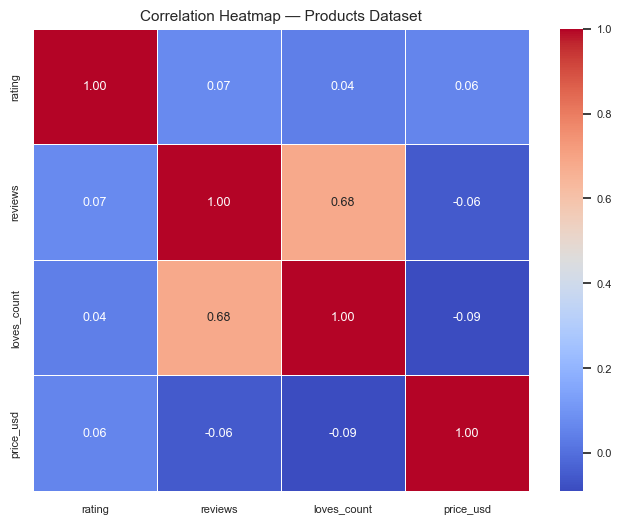

In [138]:
num_cols_products = ['rating', 'reviews', 'loves_count', 'price_usd']

products_corr = products_df[num_cols_products].corr()

print("🔹 Correlation Matrix (rating, reviews, loves_count, price):")
display(products_corr.round(3))

print("\n🔹 rating vs reviews:", products_corr.loc['rating', 'reviews'].round(3))
print("🔹 rating vs loves_count:", products_corr.loc['rating', 'loves_count'].round(3))
print("🔹 reviews vs loves_count:", products_corr.loc['reviews', 'loves_count'].round(3))
print("🔹 rating vs price_usd:", products_corr.loc['rating', 'price_usd'].round(3))
print("🔹 reviews vs price_usd:", products_corr.loc['reviews', 'price_usd'].round(3))
print("🔹 loves_count vs price_usd:", products_corr.loc['loves_count', 'price_usd'].round(3))

plt.figure(figsize=(8,6))
sns.heatmap(products_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap — Products Dataset")
plt.show()


### Insights — Correlation Heatmap

- Ratings have almost zero correlation with reviews, loves_count, and price. This means product ratings stay generally stable regardless of popularity or price.

- Reviews and loves_count show a strong positive correlation (~0.68). Products that receive many reviews also tend to receive many “loves,” indicating a shared pattern of customer engagement.

- Price has weak and slightly negative correlations with reviews and loves_count. Higher-priced products tend to get slightly fewer interactions, but the effect is very small.

- There is no meaningful correlation between price and rating. Expensive products are not rated higher or lower than cheaper ones.

- Overall, the heatmap shows low multicollinearity between variables, with the only strong relationship being between reviews and loves_count.


### 📘 Clean Beauty Analysis

#### Clean beauty is one of the most important trends in modern beauty. To evaluate clean beauty accurately, we analyze both:  

#### 1. Clean Claims

#### 2. Ingredient Reality

#### We combine both into a final clean flag and compare brands, products, and patterns.

#### 🧼 Clean Beauty Flags — Highlights vs Ingredients
Clean Highlight Keywords : clean, vegan, cruelty-free, fragrance-free, paraben-free, sulfate-free…

Dirty Ingredient Keywords: paraben, sulfate, phthalate, mineral oil, alcohol denat, synthetic dyes…



In [139]:
clean_keywords = [
    "clean", "vegan", "cruelty-free", "cruelty free",
    "fragrance-free", "fragrance free",
    "paraben-free", "paraben free",
    "sulfate-free", "sulfate free",
    "silicone-free", "silicone free",
    "non-comedogenic"
]

# Create a binary flag (0 or 1) that tells whether a product has clean-beauty–related words inside its highlights.
# Loops through the list of clean-beauty keywords you defined earlier, such as:
# Checks whether each keyword appears inside the text.
def is_clean_highlight(text):
    if not isinstance(text, str):
        return 0
    t = text.lower()
    return int(any(k in t for k in clean_keywords))

products_df["is_clean_highlight"] = products_df["highlights"].apply(is_clean_highlight)

dirty_ingredients = [
    "paraben", "sulfate", "sulphate", "phthalate",
    "mineral oil", "alcohol denat", "fragrance", "perfume",
    "synthetic dye"
]

def is_clean_ingredient(text):
    if not isinstance(text, str):
        return 1
    t = text.lower()
    return int(not any(k in t for k in dirty_ingredients))

products_df["is_clean_ingredient"] = products_df["ingredients"].apply(is_clean_ingredient)


#### 🧪Final Clean Beauty Label

A product is Clean Beauty if:

✔ it claims clean in highlights
✔ AND its ingredients are actually clean

In [140]:
products_df["is_clean_final"] = (
    products_df["is_clean_highlight"] & products_df["is_clean_ingredient"]
)

#### 🔍 Clean Claims vs Ingredient Reality

This table reveals how many products claim clean vs how many are clean.

In [141]:
clean_claim_vs_reality = pd.crosstab(
    products_df["is_clean_highlight"],
    products_df["is_clean_ingredient"],
    rownames=["Claims Clean"],
    colnames=["Actually Clean"],
    normalize="index"
).round(2) * 100

clean_claim_vs_reality

Actually Clean,0,1
Claims Clean,,
0,58.0,42.0
1,43.0,57.0


### Products That Claim Clean but Are NOT Clean

These are the “fake clean” products —
a VERY interesting insight for your presentation.

In [142]:
fake_clean = products_df[
    (products_df["is_clean_highlight"] == 1) &
    (products_df["is_clean_ingredient"] == 0)
][["brand_name", "product_name", "highlights", "ingredients"]].head(10)

fake_clean

,brand_name,product_name,highlights,ingredients
18,ABBOTT,ABBOTT Sampler Set,"['Vegan', 'Woody & Earthy Scent', 'Clean + Pla...","['Big Sky:', 'Water, Denatured Ethyl Alcohol, ..."
19,ABBOTT,The Cape Perfume,"['Clean + Planet Positive', 'Vegan', 'Cruelty-...","['Water, Denatured Ethyl Alcohol, Fragrance, (..."
21,ABBOTT,Crescent Beach Perfume,"['Vegan', 'Clean + Planet Positive', 'Fresh Sc...","['Water, Denatured ethyl alcohol, Fragrance, (..."
23,ABBOTT,Sequoia Perfume,"['Clean + Planet Positive', 'Vegan', 'Cruelty-...","['Water, Denatured Ethyl Alcohol, Fragrance, (..."
26,ABBOTT,Big Sky Eau de Parfum Travel Spray,"['Vegan', 'Woody & Earthy Scent', 'Clean + Pla...","['Water, Denatured ethyl alcohol, Fragrance, 1..."
27,ABBOTT,Big Sky Eau de Parfum,"['Clean + Planet Positive', 'Vegan', 'Cruelty-...","['Water, Denatured ethyl alcohol, Fragrance, 1..."
29,ABBOTT,Montecito Perfume,"['Clean + Planet Positive', 'Vegan', 'Cruelty-...","['Water, Denatured ethyl alcohol, Fragrance, (..."
30,ABBOTT,Mojave Perfume,"['Woody & Earthy Scent', 'Clean + Planet Posit...","['Water, Denatured ethyl alcohol, Fragrance, (..."
46,adwoa beauty,Baomint Deep Conditioning Treatment,"['Vegan', 'Clean at Sephora', 'All Hair Types'...","['Water (Aqua), Butyrospermum Parkii (Shea But..."
47,adwoa beauty,Blue Tansy Reparative Mask,"['Good for: Damage', 'Good for: Color Care', '...","['Water (Aqua), Behentrimonium Methosulfate, C..."


#### 💸 Clean Beauty vs Price Tier
Are clean products mostly budget, mid, premium, or luxury?

In [143]:
clean_by_price_tier = (
    products_df.groupby("price_tier")["is_clean_final"]
    .mean()
    .mul(100)
    .round(2)
    .sort_values(ascending=False)
)

clean_by_price_tier

price_tier
Budget     33.91
Premium    27.87
Mid        26.79
Luxury     10.02
Name: is_clean_final, dtype: float64

## 📘 Highlight Analysis — What Claims Make Beauty Products Successful?

These highlights reveal which marketing claims generate the strongest customer interaction and enthusiasm on Sephora.

#### -> Highlights Used by High-Engagement Products

In [144]:
def split_highlights(text):
    if not isinstance(text, str):
        return []
    return [h.strip().lower() for h in text.split(",")]

products_df["highlight_list"] = products_df["highlights"].apply(split_highlights)

top_loved_threshold = products_df["loves_count"].quantile(0.90)
products_df["top_loved"] = products_df["loves_count"] >= top_loved_threshold

print(f"Top loved threshold (90th percentile of loves_count): {top_loved_threshold:.0f}")

highlight_exploded = products_df.explode("highlight_list")

engagement_highlights = (
    highlight_exploded[highlight_exploded["top_loved"] == True]["highlight_list"]
    .value_counts()
    .head(10)
)

engagement_highlights


Top loved threshold (90th percentile of loves_count): 66763


highlight_list
['vegan'                215
'long-wearing'          133
'clean at sephora'      124
'cruelty-free']         121
'community favorite'    114
'hydrating'             113
combo                   109
'without parabens'       98
'matte finish'           73
'good for: dryness'      69
Name: count, dtype: int64

### Insight

- High engagement (loves_count) is a strong indicator of brand buzz and product popularity.
- The repeated appearance of the same highlight patterns across hype, quality, and engagement groups shows a **consistent formula for success**.
- Brands that emphasize ethical standards + performance benefits tend to achieve the highest customer interaction.


## 📊 Step 5 — Visualizations
To better understand patterns in pricing, product quality, customer engagement, and brand performance, this section transforms the dataset into clear and meaningful visual insights.  
By combining **statistical trends**, **feature engineering results**, and **business-focused metrics**, these visualizations help answer key questions.


#### Distributions — Understanding the Shape of the Beauty Market
These distributions reveal whether the market is balanced, skewed, or dominated by certain types of products.

We analyze:

- **Price** — affordability vs. luxury concentration  
- **Rating** — how customers score products  
- **Loves Count** — how engagement spreads across Sephora  

#### 💰 Price Distribution
Beauty markets typically show a *right-skewed* price distribution:

C:\Users\saral\AppData\Local\Temp\ipykernel_2536\3669945105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


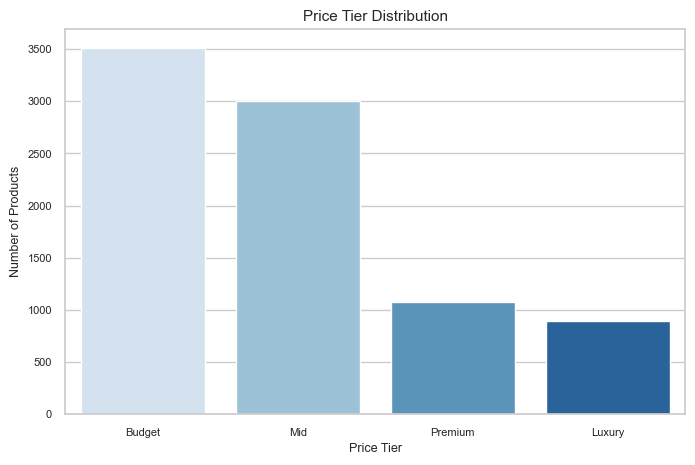

In [145]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=products_df,
    x='price_tier',
    order=['Budget', 'Mid', 'Premium', 'Luxury'],
    palette='Blues'
)
plt.title("Price Tier Distribution")
plt.xlabel("Price Tier")
plt.ylabel("Number of Products")
plt.show()

#### 🔍 Insight — Price Distribution

- Budget and Mid-tier products dominate the Sephora catalog.  
- Premium and Luxury categories form a smaller, niche segment — useful for identifying luxury brand behavior later.  
- Confirms a classic retail pyramid structure: **broad base, narrow top**.


#### ⭐ Rating Distribution

Beauty products often show "positivity bias" — customers tend to rate items highly.


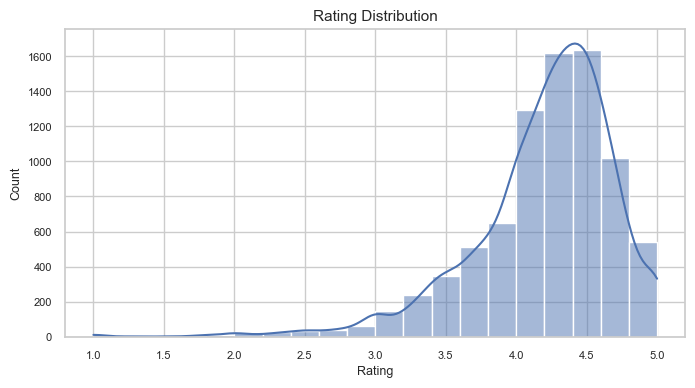

In [146]:
plt.figure(figsize=(8,4))
sns.histplot(products_df['rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.show()

#### 🔍 Insight — Rating Distribution

- Ratings cluster strongly around **4.0 – 4.6**, confirming high customer positivity. (positivity-bias)
- Very few products fall below **3.5**, indicating low dissatisfaction levels.

#### ❤️ Loves Count Distribution

Loves_count is extremely skewed:
Most products have modest engagement, while a small number go viral.

Using a **log scale** reveals the underlying structure without collapsing the plot.

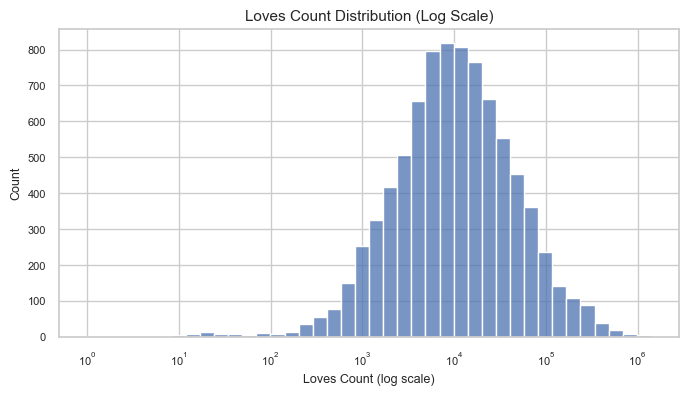

In [147]:
plt.figure(figsize=(8,4))
sns.histplot(products_df['loves_count'], bins=40, log_scale=True)
plt.title("Loves Count Distribution (Log Scale)")
plt.xlabel("Loves Count (log scale)")
plt.show()

### 🔍 Insight — Loves Count Distribution

- Engagement spans **several orders of magnitude** — from near 0 to over **1.4 million** loves.  
- Only a **small fraction of products** generate the majority of total engagement (a clear viral cluster).  
- This uneven spread supports using engineered features like **hype_group** and **weighted_rating**, which help capture true customer attention beyond raw rating.

### 🌿 Clean Beauty Analysis - Visualizations

#### ➜ “How much is the market share of clean beauty?”

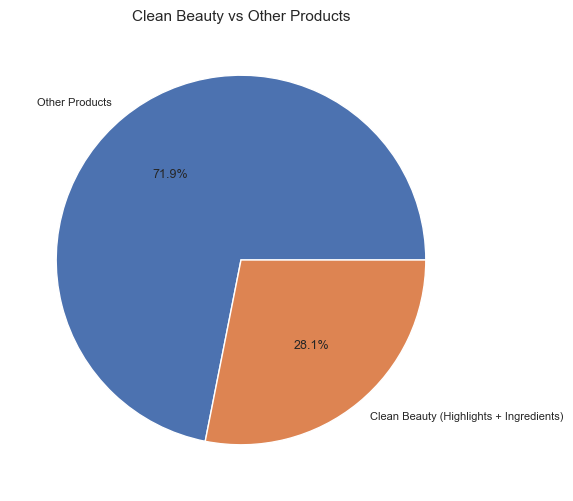

In [148]:
plt.figure(figsize=(6,6))

products_df["is_clean_final"].value_counts().rename(index={
    1: "Clean Beauty (Highlights + Ingredients)",
    0: "Other Products"
}).plot(
    kind="pie",
    autopct="%1.1f%%"
)

plt.title("Clean Beauty vs Other Products")
plt.ylabel("")
plt.show()


#### 🌱 **Insight — Clean Beauty Market Share**

- Only **28%** of Sephora’s catalog qualifies as **fully clean** (both clean highlights + clean ingredients).
- The majority (**72%**) of products remain **non-clean**..
- This indicates a **growing but not dominant** movement.

### ➜ Price Comparison (Clean vs Regular)
##### “Are clean products more expensive?”

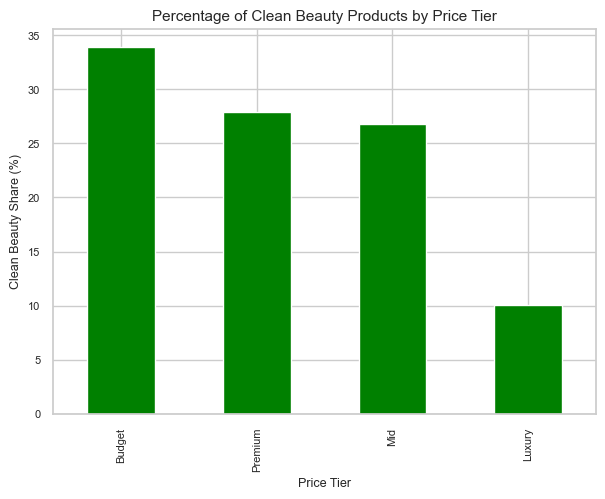

In [149]:
plt.figure(figsize=(7,5))
clean_by_price_tier.plot(kind='bar', color='green')
plt.title("Percentage of Clean Beauty Products by Price Tier")
plt.ylabel("Clean Beauty Share (%)")
plt.xlabel("Price Tier")
plt.show()

📊 **Insight — Clean Beauty Across Price Tiers**

- **Budget** products contain the *highest share* of clean beauty items (~34%).
- **Premium** and **Mid-tier** follow closely (~27–28%), showing that clean formulas are common even outside cheap categories.
- **Luxury** has the *lowest proportion* of clean products (~10%), meaning high price does not guarantee cleaner formulations.
- Overall, clean beauty is **not tied to higher prices** — if anything, it is **most accessible at lower tiers**.


### "Clean Beauty: Marketing Claims vs Ingredient Reality"

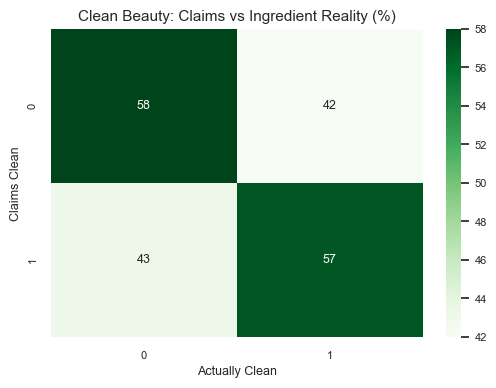

In [150]:
plt.figure(figsize=(6,4))
sns.heatmap(
    clean_claim_vs_reality,
    annot=True,
    cmap="Greens",
    fmt=".0f"
)
plt.title("Clean Beauty: Claims vs Ingredient Reality (%)")
plt.ylabel("Claims Clean")
plt.xlabel("Actually Clean")
plt.show()

#### 🧪 **Insight — Clean Claims vs Actual Ingredient Safety**

- Among products **claiming** to be clean, only **57% are actually clean** based on ingredient inspection.
- **43% of "clean claim" products fail** ingredient standards (contain parabens, sulfates, synthetic fragrance, etc.).
- On the other hand, **42% of products that do *not* claim clean** are actually clean — this suggests *under-marketing*.
- This split reveals two phenomena:
  - **Fake Clean:** brands that advertise “clean” but don't meet ingredient requirements.
  - **Silent Clean:** brands that meet clean criteria but don’t highlight it.

### ➜ Top 20 marketing claims that make products go viral

Before diving into relationships and brand/category comparisons, we start with 
**distribution plots** to understand how the main numerical variables behave:

- **Price** — how expensive is the overall Sephora catalog?
- **Rating** — how do customers score products?
- **Loves Count** — how much engagement do products receive?

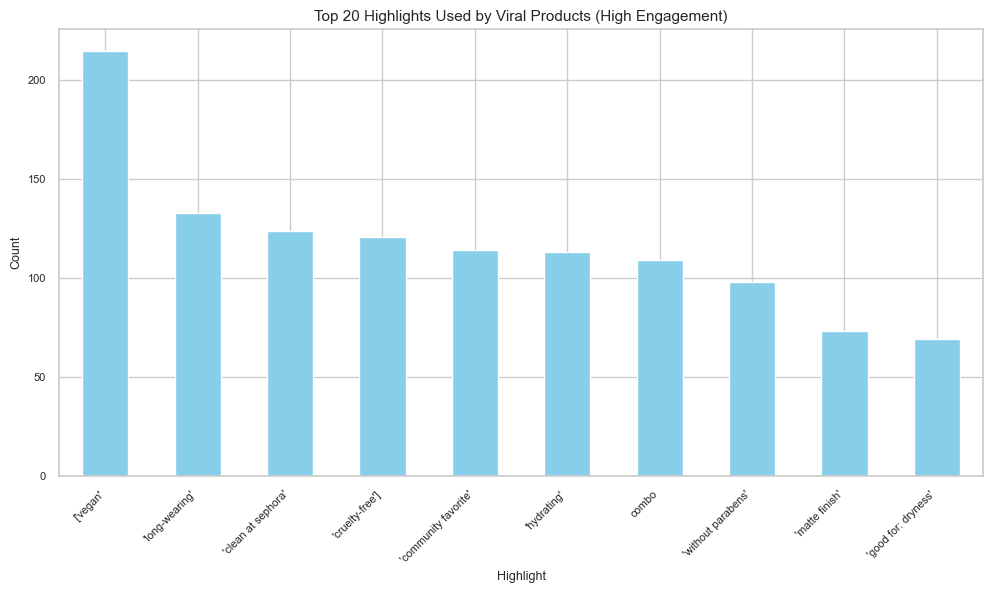

In [151]:
plt.figure(figsize=(10,6))
engagement_highlights.head(20).plot(kind="bar", color="skyblue")
plt.title("Top 20 Highlights Used by Viral Products (High Engagement)")
plt.ylabel("Count")
plt.xlabel("Highlight")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 🔍 Insight — Highlights Used by viral products

- **"Vegan"** is the #1 highlight among viral products — indicating that ethical, plant-based positioning strongly boosts engagement.
- Claims like **"long-wearing"**, **"clean at Sephora"**, and **"cruelty-free"** appear extremely often, showing that performance + ethical values combine to drive virality.
- **Community-driven claims** such as *"community favorite"* play a major role — social proof clearly influences product hype.
- Hydration-focused claims (e.g., **"hydrating"**, **"good for dryness"**) are also major drivers, suggesting consumers respond strongly to skincare-benefit statements.
- **Avoidance claims** (e.g., *"without parabens"*) consistently appear — reinforcing that consumers care about what products *don't* contain.
- Viral products tend to use **simple, high-trust claims**: clean, ethical, long-lasting, hydrating — not overly complex technical claims.

### 🌿 Luxury Beauty Analysis - Market Share

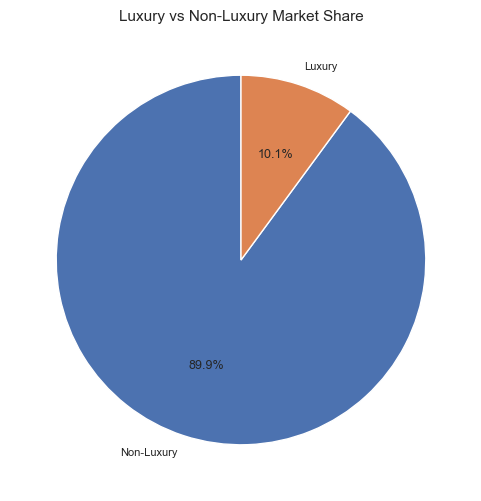

In [152]:
plt.figure(figsize=(6,6))
plt.pie(
    luxury_counts["Count"],        
    labels=luxury_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Luxury vs Non-Luxury Market Share")
plt.show()

#### 🔍 Insight — Luxury vs Non-Luxury Market Share

- Luxury products make up **only ~10%** of Sephora’s entire catalog.
- The market is heavily dominated by **non-luxury (Budget, Mid, Premium)** products — nearly **90%** of all items.
- This confirms a classic **beauty market pyramid**:
  - **Small luxury tier** at the top (exclusive, expensive, niche)
  - **Very large mid/budget base** where most brands compete

### -> Loves Count by Hype Group

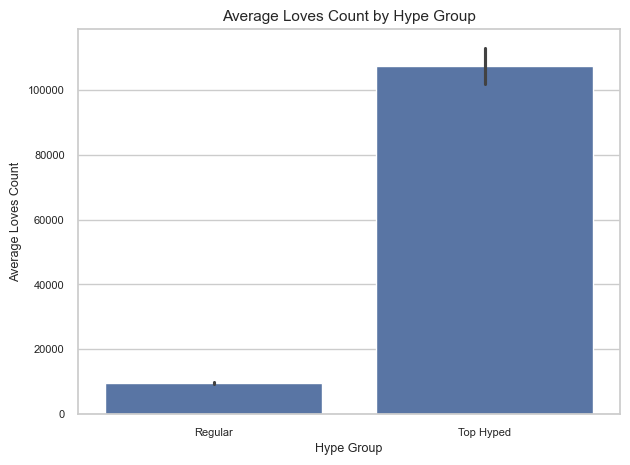

In [153]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=products_df,
    x="hype_group",
    y="loves_count",
    estimator=np.mean,
    order=["Regular", "Top Hyped"] if "Regular" in products_df["hype_group"].unique() else None
)
plt.title("Average Loves Count by Hype Group")
plt.xlabel("Hype Group")
plt.ylabel("Average Loves Count")
plt.show()

### 🔎 Insight — Loves Count by Hype Group

- **Top Hyped products receive dramatically more “loves”** than Regular products — more than **10× higher** on average.
- The gap suggests a **viral exposure effect**: once a product becomes hyped, it attracts far more visibility and social proof.


### -> Review Volume Distribution

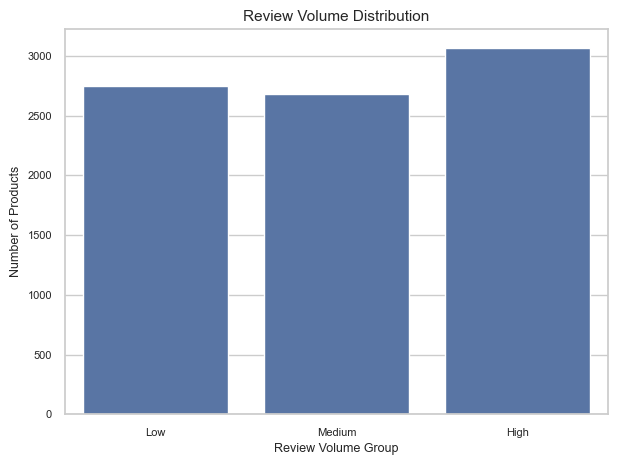

In [154]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=products_df,
    x="review_volume",
    order=["Low", "Medium", "High"]
)
plt.title("Review Volume Distribution")
plt.xlabel("Review Volume Group")
plt.ylabel("Number of Products")
plt.show()

#### 🔍 Insight - Review Volume Distribution
- The dataset is **well-balanced** across Low, Medium, and High review groups.
- Since all three groups have similar sizes, segmentation analysis will not be biased toward one category.

### -> Engagement Space (Reviews - Loves_count)
#### How *visible* and how *liked* a product is?

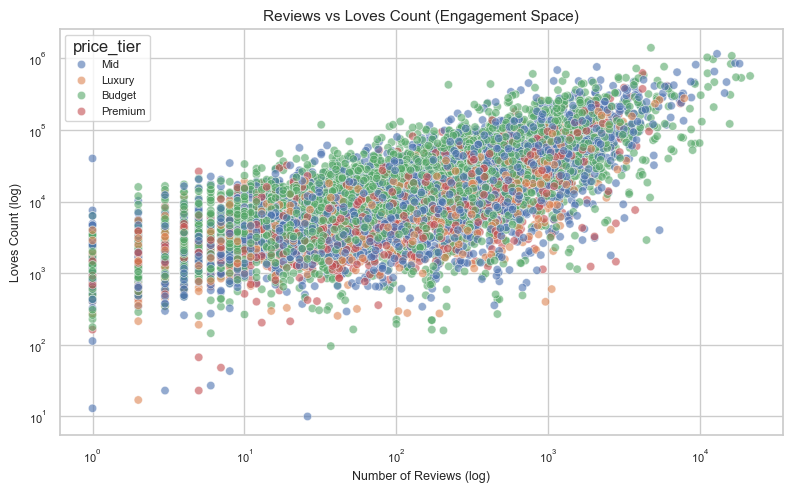

In [155]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=products_df,
    x="reviews",
    y="loves_count",
    hue="price_tier",
    alpha=0.6
)
plt.xscale("log")
plt.yscale("log")
plt.title("Reviews vs Loves Count (Engagement Space)")
plt.xlabel("Number of Reviews (log)")
plt.ylabel("Loves Count (log)")
plt.tight_layout()
plt.show()

#### 🔎 **Insight — Reviews vs Loves Count (Engagement Space)**

- Strong **positive correlation**: products with more reviews consistently receive more loves
- **Viral cluster**: a small set of products sits in the top-right — 10k+ reviews and 50k–500k loves.
- **Long tail**: the bottom-left region contains thousands of low-visibility products with little engagement.
- **Price tier doesn’t predict virality**: budget, mid, premium, and luxury items all follow the same trend and appear throughout the plot.
- This reveals **a winner-takes-all market**, where a few products dominate attention while most remain unseen.

### -> How much does price affect in popularity of the beauty market products?

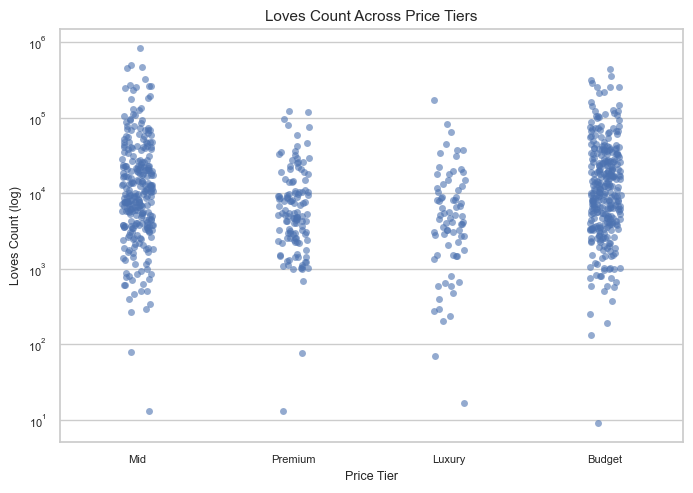

In [156]:
sample_df = products_df.sample(800, random_state=42)

plt.figure(figsize=(7,5))
sns.stripplot(
    data=sample_df,
    x="price_tier",
    y="loves_count",
    alpha=0.6
)
plt.yscale("log")
plt.title("Loves Count Across Price Tiers")
plt.xlabel("Price Tier")
plt.ylabel("Loves Count (log)")
plt.tight_layout()
plt.show()

### 📊 Insight — **Loves Count Across Price Tiers**

- **Engagement spans all price tiers**, showing that viral success does not depend on being budget, mid, premium, or luxury.
- **Budget and Mid-tier products have the widest engagement spread**, meaning they produce the most viral hits as well as low-engagement items.
- **Premium and Luxury products show tighter engagement clusters**.
- This plot confirms that **popularity in beauty is driven by product performance and trend momentum—not price.**


### -> Category Heatmap: Price vs Rating vs Loves

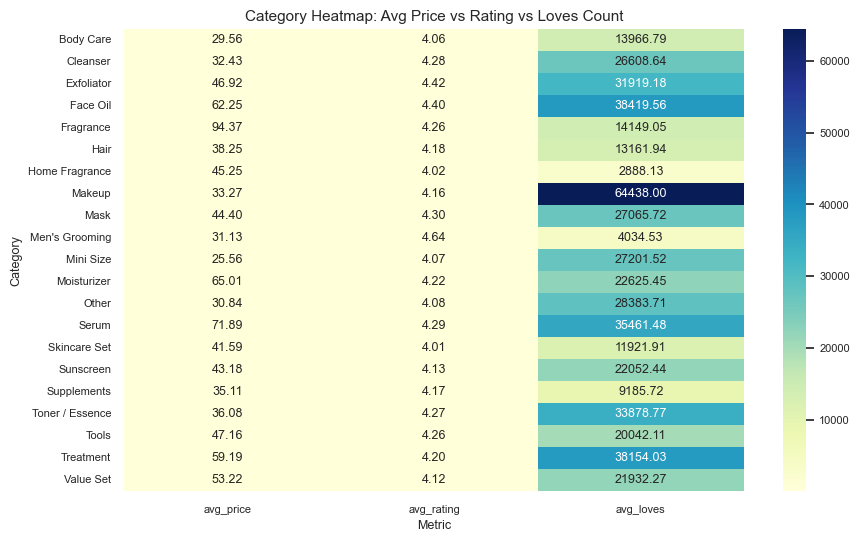

In [157]:
category_summary = (
    products_df.groupby("category_simplified")
    .agg(
        avg_price=("price_usd", "mean"),
        avg_rating=("rating", "mean"),
        avg_loves=("loves_count", "mean")
    )
    .round(2)
)

plt.figure(figsize=(10,6))
sns.heatmap(category_summary, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Category Heatmap: Avg Price vs Rating vs Loves Count")
plt.xlabel("Metric")
plt.ylabel("Category")
plt.show()

#### 📊 Insight — Category Heatmap **(Price × Rating × Loves)**

- **Makeup is the clear engagement leader**, with an average loves_count above 64K — far higher than any other category. This confirms that Makeup drives the most visibility and viral interest on Sephora.
- **Serum, Treatment, Face Oil, and Fragrance** are the **premium-priced** categories, showing that consumers accept higher prices in targeted skincare and fragrances.
- **Ratings remain consistently high (4.0–4.3)** across all categories, continuing the strong positivity-bias observed in the rating distribution.
- **Mini Size products deliver strong engagement at low cost**, revealing that minis are popular for discovery, gifting, and trial.
- **Home Fragrance and Men’s Grooming** receive the **lowest engagement**.


## Final Insights Summary

- Top-performing products are consistently those with high engagement, not high price. Metrics such as **loves_count** and **review** volume are the **strongest indicators of real popularity**. Ratings, on their own, are uniformly high and do not differentiate performance.

- **Price and rating show almost no relationship**. Expensive products are not rated higher, and budget products often perform just as well or better. Customer satisfaction is influenced more by product claims, benefits, and brand trust than by price.

- Brand performance varies widely, but the **strongest brands maintain consistent engagement** through clear claims, strong community reputation, and effective marketing.

- Ingredient analysis shows a clear shift toward clean beauty. However, many products** claim “clean” without meeting actual ingredient standards**, highlighting a **gap between marketing and reality**. Truly clean products tend to cluster in budget and premium tiers rather than luxury.

- Across all analyses, **certain highlights repeatedly appear in successful products**: “vegan,” “cruelty-free,” “clean at sephora,” “long-wearing,” and “hydrating.” These claims shape how consumers perceive value, quality, and trust.

- **Product success is influenced by a combination of ethical claims, performance benefits, and ingredient transparency**. These factors matter more to consumers than price alone.

Overall, the analysis shows that **winning in the beauty market depends on understanding consumer priorities: clean formulas, ethical standards, proven performance, and strong community engagement**. Data-driven insights from these patterns are essential for shaping product strategy, marketing decisions, and competitive positioning.


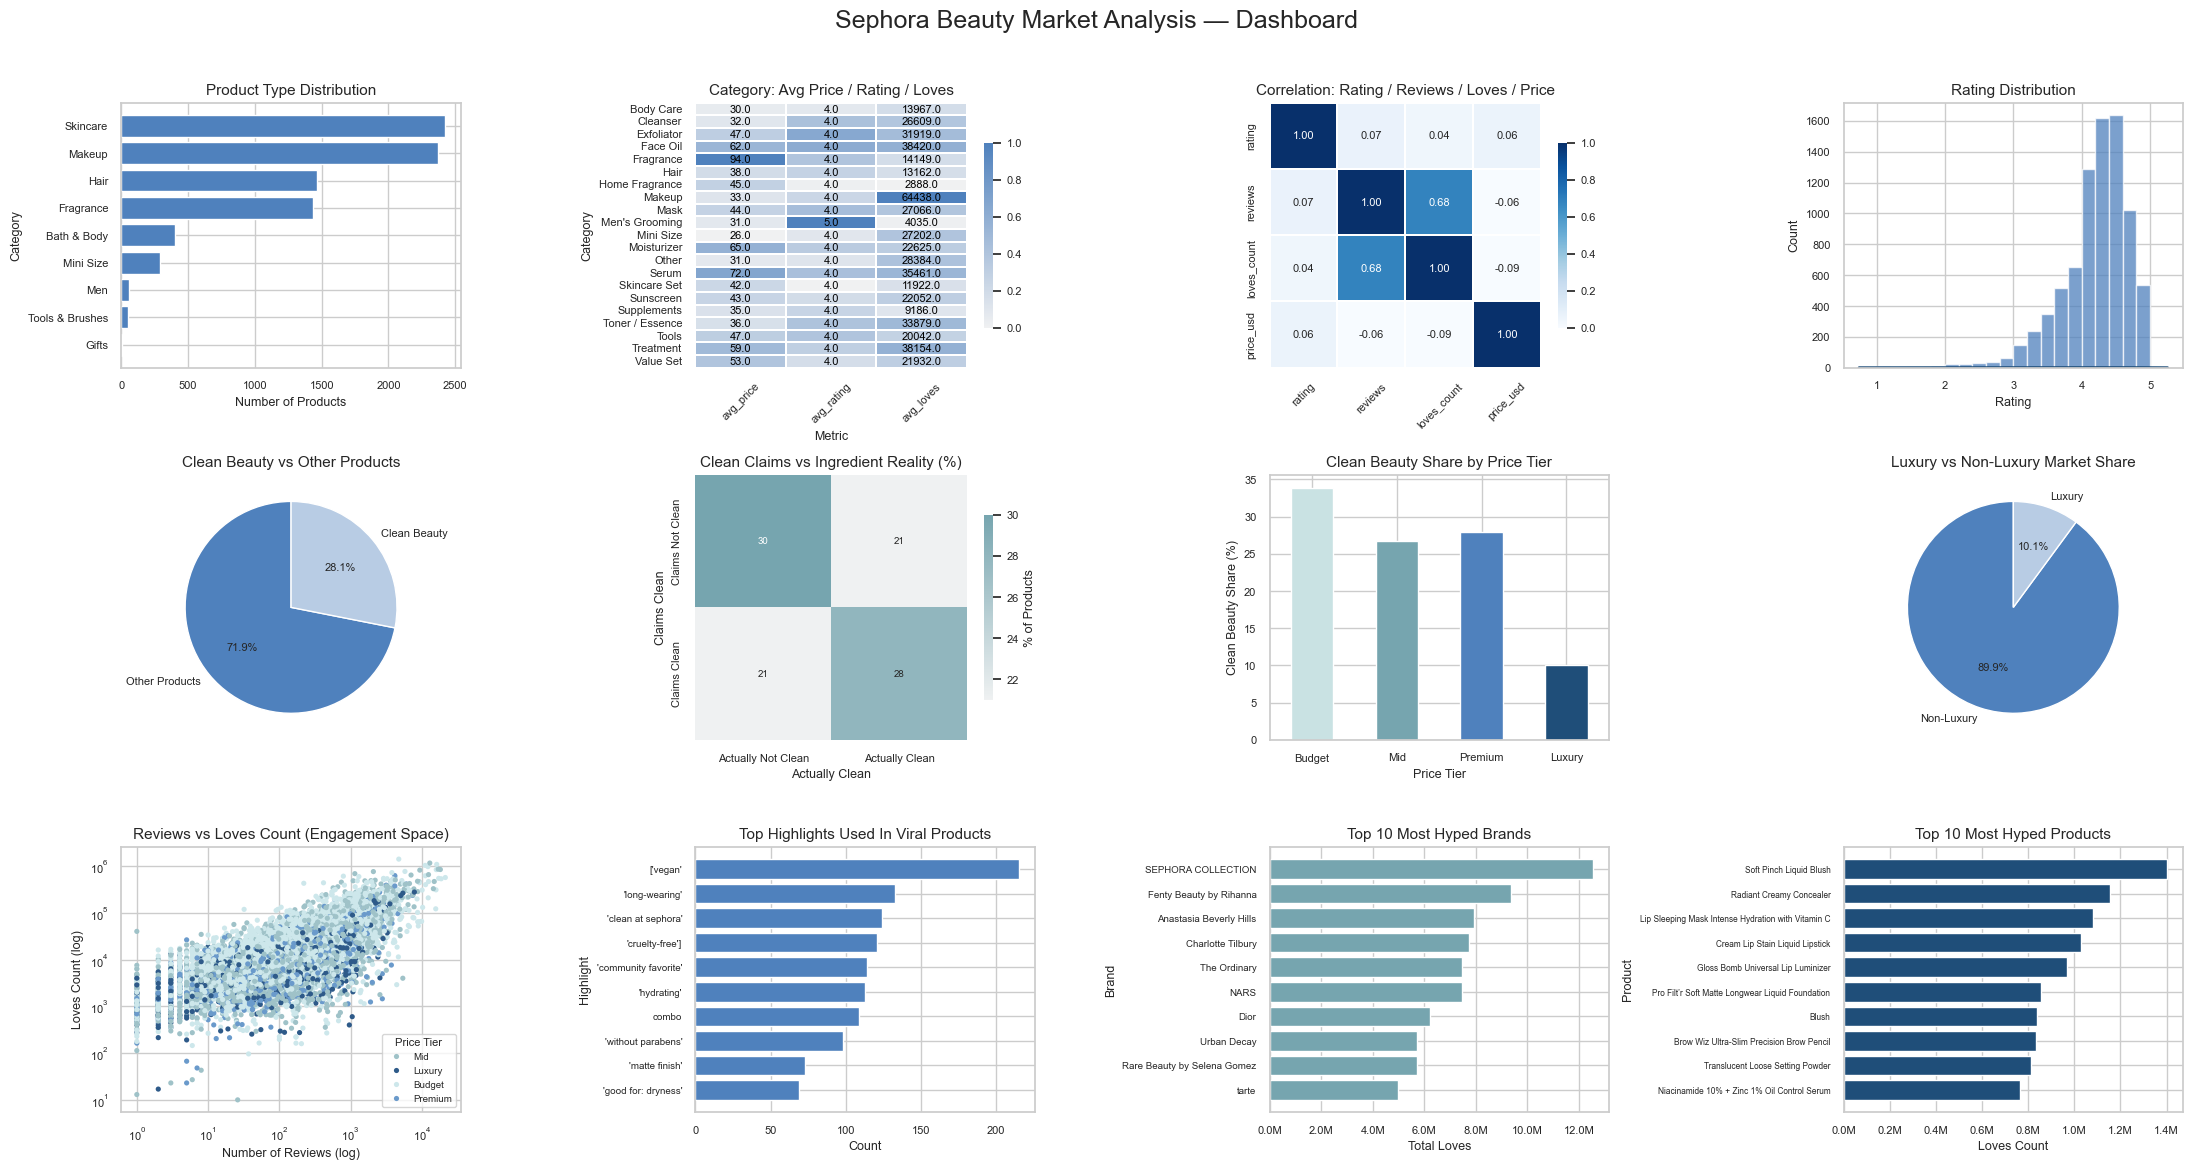

In [158]:
import matplotlib.ticker as mtick

PALETTE = {
    "light":  "#A7D3E8",
    "medium": "#72B1D5",
    "dark":  "#4A90E2",
    "deep":  "#2E6F9F"
}
primary_blue = "#4F81BD"
light_blue   = "#B8CCE4"
dark_blue    = "#1F4E79"
teal         = "#76A5AF"
light_teal   = "#C9E2E3"

sns.set_theme(style="whitegrid")

plt.rcParams.update({
    "font.size": 9,
    "axes.titlesize": 11,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
    "figure.titlesize": 18,
})

scatter_palette = {
    "Budget":  "#CDE7EB",   # very light icy teal
    "Mid":     "#9FC2C8",   # soft medium teal
    "Premium": "#6A9ACB",   # medium blue
    "Luxury":  "#2E5A89"    # deep blue (luxury shade)
}
# -------------------------------------------------------
# 1. Aggregations
# -------------------------------------------------------

# 1.1 Product type distribution
primary_counts = (
    products_df["primary_category"]
    .value_counts()
    .sort_values(ascending=True)
)

# (1,2) Category: Avg Price / Rating / Loves
ax = axes[0, 1]

cat_cmap = sns.light_palette("#4A90E2", n_colors=8, as_cmap=True)  # soft pastel blue

sns.heatmap(
    norm_summary,
    ax=ax,
    cmap=cat_cmap,
    annot=category_summary.round(0),
    fmt="",
    cbar_kws={"shrink": 0.7},
    annot_kws={"size": 8, "color": "black"},
    linewidths=0.4,
    linecolor="white"
)

ax.set_title("Category: Avg Price / Rating / Loves")
ax.set_xlabel("Metric")
ax.set_ylabel("Category")
ax.tick_params(axis="x", rotation=45)

# 1.3 Correlation matrix
corr_matrix = products_df[["rating", "reviews", "loves_count", "price_usd"]].corr().round(2)

# 1.4 Clean beauty overall share
clean_counts = products_df["is_clean_final"].value_counts().sort_index()
clean_labels = ["Other Products", "Clean Beauty"]
clean_sizes = [clean_counts.get(0, 0), clean_counts.get(1, 0)]
clean_share = pd.Series(clean_sizes, index=clean_labels)

# 1.5 Clean claims vs ingredient reality (%)
claims = products_df["is_clean_highlight"]
reality = products_df["is_clean_ingredient"]
clean_claim_vs_reality = (
    pd.crosstab(claims, reality, normalize="all") * 100
).round(0)
clean_claim_vs_reality.index = ["Claims Not Clean", "Claims Clean"]
clean_claim_vs_reality.columns = ["Actually Not Clean", "Actually Clean"]

# 1.6 Clean beauty share by price tier
clean_by_price_tier = (
    products_df
    .groupby("price_tier")["is_clean_final"]
    .mean()
    .mul(100)
    .reindex(["Budget", "Mid", "Premium", "Luxury"])
)

# 1.7 Luxury vs non-luxury share
luxury_counts = (
    products_df["is_luxury"]
    .value_counts()
    .rename(index={False: "Non-Luxury", True: "Luxury"})
)

# 1.8 Engagement scatter sample
engagement_df = products_df.dropna(subset=["reviews", "loves_count", "price_tier"]).copy()

# 1.9 Highlights for viral products
if "highlight_list" not in products_df.columns:
    def split_highlights(text):
        if not isinstance(text, str):
            return []
        return [h.strip().lower() for h in text.split(",")]
    products_df["highlight_list"] = products_df["highlights"].apply(split_highlights)

if "top_loved" not in products_df.columns:
    top_loved_threshold = products_df["loves_count"].quantile(0.90)
    products_df["top_loved"] = products_df["loves_count"] >= top_loved_threshold

highlight_exploded = products_df.explode("highlight_list")
engagement_highlights = (
    highlight_exploded[highlight_exploded["top_loved"] == True]["highlight_list"]
    .value_counts()
)
top_highlights = engagement_highlights.head(10).sort_values(ascending=True)

# 1.10 Top 10 brands by loves
loves_by_brand = (
    products_df.groupby("brand_name")["loves_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .to_frame(name="total_loves")
)
top_brands = loves_by_brand.iloc[::-1]

# 1.11 Top 10 products by loves
top_loved_products = (
    products_df[["product_name", "loves_count"]]
    .sort_values("loves_count", ascending=False)
    .head(10)
    .set_index("product_name")
)
top_products = top_loved_products["loves_count"].sort_values(ascending=True)

# -------------------------------------------------------
# 2. 12-plot dashboard (all in ONE figure)
# -------------------------------------------------------

fig, axes = plt.subplots(3, 4, figsize=(22, 12))
fig.suptitle("Sephora Beauty Market Analysis — Dashboard", y=0.97)

# =========== ROW 1 =====================================

# (1,1) Product Type Distribution
ax = axes[0, 0]
ax.barh(primary_counts.index, primary_counts.values, color=primary_blue)
ax.set_title("Product Type Distribution")
ax.set_xlabel("Number of Products")
ax.set_ylabel("Category")

# (1,2) Category: Avg Price / Rating / Loves
ax = axes[0, 1]

cat_cmap = sns.light_palette("#4F81BD", n_colors=8, as_cmap=True)

sns.heatmap(
    norm_summary,
    ax=ax,
    cmap=cat_cmap,
    annot=category_summary.round(0),
    fmt="",
    cbar_kws={"shrink": 0.7},
    annot_kws={"size": 8, "color": "black"},
    linewidths=0.3,
    linecolor="white"
)

ax.set_title("Category: Avg Price / Rating / Loves")
ax.set_xlabel("Metric")
ax.set_ylabel("Category")
ax.tick_params(axis="x", rotation=45)

# (1,3) Correlation heatmap (stronger blues, 1.00 darkest)
ax = axes[0, 2]

corr_cmap = sns.color_palette("Blues", as_cmap=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=corr_cmap,
    vmin=0,   
    vmax=1,  
    ax=ax,
    cbar_kws={"shrink": 0.7},
    annot_kws={"size": 8},
    linewidths=0.3,
    linecolor="white"
)

ax.set_title("Correlation: Rating / Reviews / Loves / Price")
ax.tick_params(axis="x", rotation=45)

# (1,4) Rating distribution
ax = axes[0, 3]
ax.hist(products_df["rating"], bins=20, color=primary_blue, edgecolor="white", alpha=0.75)
sns.kdeplot(products_df["rating"], color=dark_blue, linewidth=2, ax=ax)
ax.set_title("Rating Distribution")
ax.set_xlabel("Rating")
ax.set_ylabel("Count")

# =========== ROW 2 =====================================

# (2,1) Clean Beauty vs Other Products (pie)
ax = axes[1, 0]
ax.pie(
    clean_share.values,
    labels=clean_share.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[primary_blue, light_blue],
    textprops={"fontsize": 8}
)
ax.set_title("Clean Beauty vs Other Products")

# (2,2) Clean Claims vs Ingredient Reality (%)
ax = axes[1, 1]
claims_cmap = sns.light_palette(teal, as_cmap=True)
sns.heatmap(
    clean_claim_vs_reality,
    annot=True,
    fmt=".0f",
    cmap=claims_cmap,
    cbar_kws={"label": "% of Products", "shrink": 0.7},
    ax=ax,
    annot_kws={"size": 7},
)
ax.set_title("Clean Claims vs Ingredient Reality (%)")
ax.set_xlabel("Actually Clean")
ax.set_ylabel("Claims Clean")

# (2,3) Clean Beauty Share by Price Tier
ax = axes[1, 2]
tier_bar_colors = [light_teal, teal, primary_blue, dark_blue]
clean_by_price_tier.plot(kind="bar", ax=ax, color=tier_bar_colors)
ax.set_title("Clean Beauty Share by Price Tier")
ax.set_xlabel("Price Tier")
ax.set_ylabel("Clean Beauty Share (%)")
ax.tick_params(axis="x", rotation=0)

# (2,4) Luxury vs Non-Luxury Market Share (pie)
ax = axes[1, 3]
ax.pie(
    luxury_counts.values,
    labels=luxury_counts.index,
    colors=[primary_blue, light_blue],
    autopct="%.1f%%",
    startangle=90,
    textprops={"fontsize": 8}
)
ax.set_title("Luxury vs Non-Luxury Market Share")

# =========== ROW 3 =====================================

# (3,1) Reviews vs Loves Count (Engagement Space)
ax = axes[2, 0]

sns.scatterplot(
    data=engagement_df,
    x="reviews",
    y="loves_count",
    hue="price_tier",
    palette=scatter_palette,
    ax=ax,
    s=14,
    linewidth=0
)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Reviews vs Loves Count (Engagement Space)")
ax.set_xlabel("Number of Reviews (log)")
ax.set_ylabel("Loves Count (log)")
ax.legend(title="Price Tier", fontsize=7, title_fontsize=8, loc="lower right")

# Top Highlights of Viral Products
ax = axes[2, 1]
ax.barh(top_highlights.index, top_highlights.values, color=primary_blue)
ax.set_title("Top Highlights Used In Viral Products")
ax.set_xlabel("Count")
ax.set_ylabel("Highlight")
ax.tick_params(axis="y", labelsize=7)

# Top 10 Brands by Total Loves
ax = axes[2, 2]
ax.barh(top_brands.index, top_brands["total_loves"], color=teal)
ax.set_title("Top 10 Most Hyped Brands")
ax.set_xlabel("Total Loves")
ax.set_ylabel("Brand")
ax.tick_params(axis="y", labelsize=7)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{x/1e6:.1f}M"))

# Top 10 Products by Loves
ax = axes[2, 3]
ax.barh(top_products.index, top_products.values, color=dark_blue)
ax.set_title("Top 10 Most Hyped Products")
ax.set_xlabel("Loves Count")
ax.set_ylabel("Product")
ax.tick_params(axis="y", labelsize=6)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{x/1e6:.1f}M"))

# -------------------------------------------------------
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()